# Kth Smallest Element in a BST

Given the root of a binary search tree, and an integer k, return the k-th smallest value (1-indexed) of all the values of the nodes in the tree

**Example**


*Input*: k=3

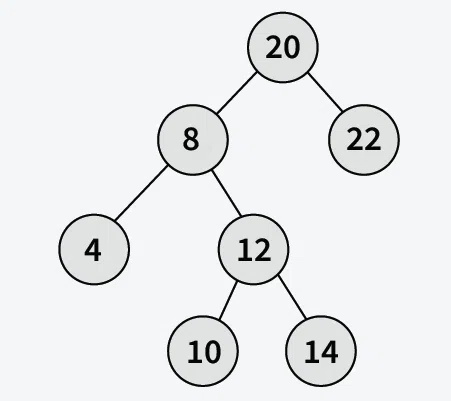

***Output**: 10*    
***Explanation**: The inorder traversal of given BST is [4,8,10,12,14,20,22] and its 3rd smallest element is 10*



**Example**

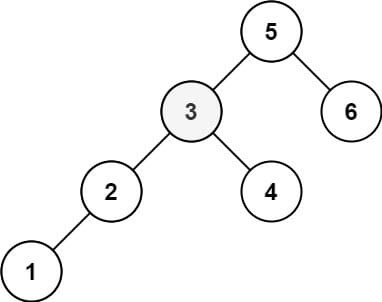

```python
Input: root = [3,5,6,2,4,null,null,1], k=3
Output: 3
```

## Solution

### Function to build a binary tree

In [12]:
# Tree Node
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

# Function to build the Tree from an array
def build_tree_from_array(arr):
    if not arr:
        return None
    
    root = TreeNode(arr[0]) # Root is the first element
    queue = [root] # Use the queue to track nodes for level-order insertion. 
    i = 1

    # Loop through all the array
    while i < len(arr):
        current = queue.pop(0) # Get the current node

        if current == None:
            i += 1
            continue

        # Add the left child
        if i < len(arr):
            current.left = TreeNode(arr[i])
            queue.append(current.left)
            i += 1

        # Add the right child
        if i < len(arr):
            current.right = TreeNode(arr[i])
            queue.append(current.right)
            i += 1
    
    return root

root = build_tree_from_array([5,3,6,2,4,None,None,1])

To find the k-th smallest element in a BST, we can perform an *inorder traversal*

Since inorder traversal of a BST visits nodes in ascending order, we just need to keep track of how many nodes we have visited.  

We'll use an iterative approach with a stack to perform the inorder traversal. This avoids recursion stack overflow for very deep trees.  

When we've visited k nodes, we'll have found our answer. This approach is efficient since we only need to traverse until we find the k-th element, not the entire tree. 

The time complexity is O(H + k) where H is the height of the tree. In the worst case when k is large, it becomes O(N).

In [15]:
def kthSmallest(root, k):
    # Stack for iterative inorder traversal 
    stack = []

    # Current node pointer 
    current = root
    # Counter for number of nodes visited. 
    count = 0

    while current or stack:
        # Traverse to leftmost node 
        while current:
            stack.append(current)
            current = current.left

        # Process current node
        current = stack.pop()
        count += 1

        # If we've found kth element, return it 
        if count == k:
            return current.val
        
        # Move to right subtree
        current = current.right

# Building the tree given the array
root = build_tree_from_array([5,3,6,2,4,None,None,1])
print(kthSmallest(root, 3))

3
